In [1]:
%matplotlib inline

In [1443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2203]:
import geometry

In [2204]:
reload(geometry)

<module 'geometry' from 'geometry.py'>

In [2205]:
from geometry import Point, Polygon, RegularPolygon, CircleList, RandomPolygon

In [1990]:
angles = np.linspace(0, np.pi * 2, 10)[:-1]
points = zip(np.cos(angles), np.sin(angles))

In [1991]:
p = Polygon([(0, 0), (1, 0), (1, 2), (0, 2)])

In [1816]:
p.points[0].x = 0.
p.points[0].y = 0.

In [1600]:
p.is_convex()

True

In [1601]:
p.area()

3.0207006182844958

In [1579]:
j = 2

In [1580]:
j

2

In [1992]:
p.area()

2.0

In [2915]:
def plot_poly(p, size=2, scatter=False):
    plt.figure(figsize=(5, 5))
    if scatter:
        x, y = p.scatter()
        plt.scatter(x, y)
    else:
        plt.plot(*p.lines())
        i = 0
        for point in p.points:
            plt.text(point.x, point.y, i, color="red")
            i += 1
    plt.ylim(-size, size)
    plt.xlim(-size, size)

In [ ]:
[  87.77145586  117.00919561   70.54508915   84.67425938]

In [2533]:
p = RegularPolygon(5)
p.points[0].y = 2.

In [2752]:
j % 5

2

In [2878]:
p.angles() * 180 / np.pi

array([  26.09425233,  102.33685987,   27.47881037,   69.28140295,
        134.80867447])

In [3039]:
p = RandomPolygon(5)

In [2951]:
p = Polygon([(0, np.sqrt(5)), (-1., 2.), (-1., -2.), (1., -2.)])

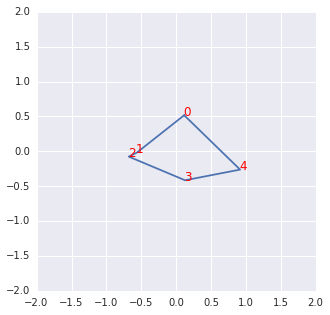

In [3040]:
p = p.flip(j % p.N)
j+=1

plot_poly(p, 2)

(-1, 1)

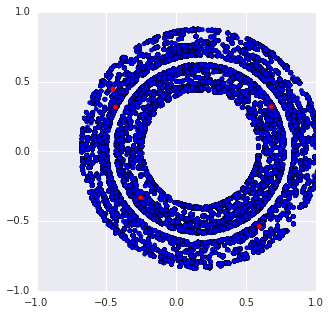

In [3042]:
plt.figure(figsize=(5, 5))
for i in range(10000):
#     p = p.flip(j % p.N)#int(np.random.random() * 7))
    p = p.flip(int(np.random.random() * len(p)))
    j += 1
    x, y = p.scatter()
    plt.scatter(x, y)
# print "CONVEX?", p.is_convex(), "AREA:", p.area()
# print p.angles() * 180 / np.pi
x, y = p.scatter()
plt.scatter(x, y, color='red')
plt.ylim((-1, 1))
plt.xlim((-1, 1))

# 1. Equal area
# 2. Equal set of side lengths $\{l_1, l_2, l_3...l_n\}$
# 3. ????

## 1 & 2 & 3 --> Some path of flips exists from shape 1 to shape 2

In [2926]:
np.mean(x), np.mean(y)

(-0.13444950650771734, 0.056836115678382593)

In [2530]:
# plt.figure(figsize=(5, 5))
T = 10000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    p = RandomPolygon(10)
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)

(array([  3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   1.00000000e+01,   7.00000000e+00,
          1.50000000e+01,   1.90000000e+01,   1.20000000e+01,
          1.60000000e+01,   2.70000000e+01,   1.70000000e+01,
          2.20000000e+01,   2.20000000e+01,   2.80000000e+01,
          3.20000000e+01,   3.70000000e+01,   5.40000000e+01,
          3.60000000e+01,   7.00000000e+01,   7.40000000e+01,
          9.20000000e+01,   8.70000000e+01,   1.20000000e+02,
          1.31000000e+02,   1.41000000e+02,   1.77000000e+02,
          1.65000000e+02,   2.08000000e+02,   2.32000000e+02,
          2.58000000e+02,   2.83000000e+02,   3.03000000e+02,
          4.06000000e+02,   4.30000000e+02,   4.39000000e+02,
          5.15000000e+02,   5.74000000e+02,   6.16000000e+02,
          6.84000000e+02,   7.76000000e+02,   8.43000000e+02,
        

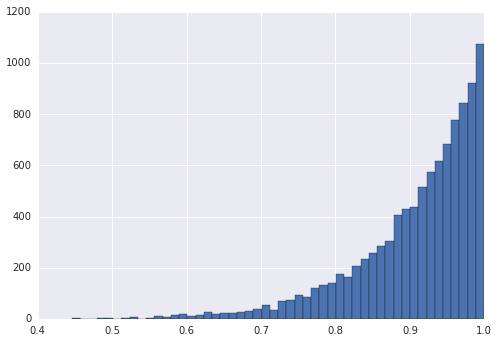

In [2529]:
plt.hist(np.sqrt(max_rs), bins=50);

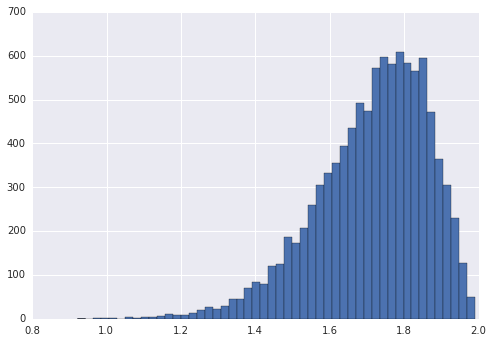

In [2532]:
plt.hist(np.sqrt(max_ds), bins=50);

In [2515]:
# plt.figure(figsize=(5, 5))
T = 5000
max_rs = np.zeros(T)
min_rs = np.zeros(T)
max_ds = np.zeros(T)
for i in range(T):
    r = np.random.random()
#     j = int(r *  len(p)) 
    j = i % len(p) 
    p = p.flip(j)
#     x, y = p.scatter()
    rs = [a * a for a in p.points]
    ds = [(a-b) * (a-b) for a in p.points for b in p.points]
    max_ds[i] = max(ds)
    max_rs[i] = max(rs)
    min_rs[i] = min(rs)
#     plt.scatter(x, y, alpha=.1)
max_d = np.sqrt(max_ds.max())
max_r = np.sqrt(max_rs.max())
min_r = np.sqrt(min_rs.min())

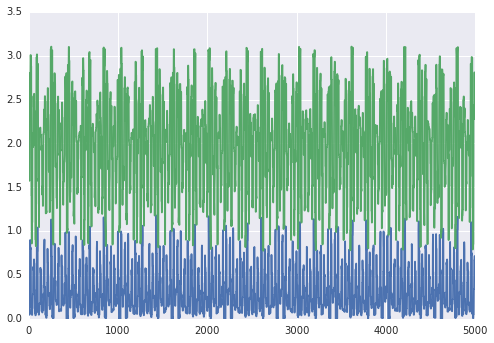

In [2516]:
plt.plot(min_rs)
plt.plot(max_rs)

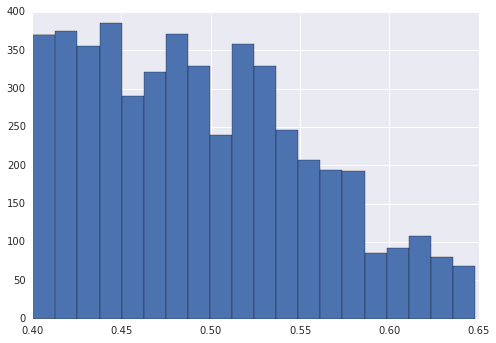

In [2507]:
plt.hist(min_rs, bins=20);

In [2517]:
min_r, max_r, max_d

(0.0096877082553496075, 1.7618303933293926, 2.2071145991856769)

In [2518]:
min_r**.5, max_r**.5, max_d**.5

(0.098426156357695929, 1.3273395923159199, 1.4856360924485097)